# Best perf so far:

76% without equipments

80% with

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

# Aramis

In [2]:
def safe_eval(row):
    try:
        return eval(row)
    except:
        return row


def handle_defaut(row):
    row = safe_eval(str(row))
    if isinstance(row, dict):
        row = row['impact'] + row['griffure'] + row['rayure'] + row['marque']
    return row

In [3]:
df_aramis = pd.concat([pd.read_csv('aramis.csv'), pd.read_csv('aramis2.csv'), pd.read_csv('aramis3.csv')])
df_aramis['seller'] = ['aramis']*len(df_aramis)

df_aramis['defauts'] = df_aramis['defauts'].apply(handle_defaut)
df_lacentrale = pd.read_csv('lacentrale2.csv')

In [4]:
df_aramis

,Unnamed: 0,name,price,leasing,equipments,date,motor,fuel,transmission,type,kilometers,doors,seats,images,defauts,seller
0,0,Peugeot 308 SW,12499,NaN,"['Start & Stop', 'Direction Assistée électriqu...",2016,1.2 PureTech 130 BVM6,Essence,Boîte manuelle 6 rapports,Voiture d'occasion,106977,5,NaN,NaN,13,aramis
1,1,Citroën C4,10699,NaN,"['Aide au stationnement arrière', 'Climatisati...",2015,1.6 BlueHDi 100 BVM5,Diesel,Boîte manuelle 5 rapports,Voiture d'occasion,135390,5,NaN,NaN,22,aramis
2,2,Volkswagen Polo,10499,NaN,"['Climatisation manuelle', ""Appuie-tête à sécu...",2014,1.2 60 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,80770,3,NaN,NaN,12,aramis
3,3,Toyota Yaris,10999,NaN,"['Climatisation manuelle', 'Vitres AV électriq...",2016,1.0 VVT-i 70 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,98195,5,NaN,NaN,14,aramis
4,4,Citroën C4 Cactus,12699,NaN,"['Climatisation automatique', 'Régulateur et L...",2016,1.2 PureTech 82 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,42981,5,NaN,NaN,14,aramis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,50,Volkswagen Passat SW,25399,NaN,"['Climatisation automatique ""Pure Air Climatro...",2021,1.4 TSI Hybride Rechargeable DSG6,NaN,Boîte automatique,Voiture d'occasion,30092,5,NaN,NaN,0,aramis
51,51,Audi Q3,25999,NaN,"['Climatiseur automatique confort', ""Système d...",2017,1.4 TFSI sport,Essence,Boîte automatique,Voiture d'occasion,84564,4,NaN,NaN,17,aramis
52,52,Toyota C-HR,28999,NaN,['Système d’aide au stationnement automatique ...,2022,184h,NaN,Boîte automatique 1 rapport,Voiture d'occasion,17,5,NaN,NaN,0,aramis
53,53,Mercedes Classe A,34499,NaN,"[""Pack Premium : Eclairage d'ambiance 64 coule...",2022,200d 8G-DCT,Diesel,Boîte automatique 8 rapports,Voiture d'occasion,18030,5,NaN,NaN,1,aramis


In [5]:
df_lacentrale

,Unnamed: 0,href,name,price,leasing,equipments,date,motor,fuel,transmission,type,kilometers,doors,seats,images,defauts,location,critair,extra
0,0,/auto-occasion-annonce-69113293722.html,SKODA KAROQ phase 2,34220.0,NaN,"['Autre', 'Jantes alliage 19\'\' ""SAGITARIUS"" ...",2023.0,"<div class=""Text_Text_text SummaryInformation_...",Diesel,Automatique,NaN,11696.0,5.0,5.0,NaN,NaN,NIMES 30900,2.0,"{'year': '2023', 'kilometers': ' 11 696 km', '..."
1,1,/auto-occasion-annonce-69112883511.html,KIA E-NIRO,30960.0,NaN,"['Extérieur et Chassis', 'Rétroviseurs rabatta...",2021.0,"<div class=""Text_Text_text SummaryInformation_...",Electrique,Automatique,NaN,43291.0,5.0,5.0,NaN,NaN,MONTELIMAR 26200,0.0,"{'year': '2021', 'kilometers': ' 43 291 km', '..."
2,2,/auto-occasion-annonce-87102824038.html,VOLKSWAGEN POLO V phase 2,16320.0,NaN,"['Extérieur et Chassis', 'Rétroviseurs extérie...",2017.0,"<div class=""Text_Text_text SummaryInformation_...",Essence,Automatique,NaN,75500.0,5.0,5.0,NaN,NaN,FONTENAY LE FLEURY 78330,1.0,"{'year': '2017', 'kilometers': ' 75 500 km', '..."
3,3,/auto-occasion-annonce-69112354873.html,MINI COUNTRYMAN II,23210.0,320.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2018.0,"<div class=""Text_Text_text SummaryInformation_...",Diesel,Automatique,NaN,91796.0,5.0,5.0,NaN,NaN,BESSIERES 31660,2.0,"{'year': '2018', 'kilometers': ' 91 796 km', '..."
4,4,/auto-occasion-annonce-69112703036.html,PEUGEOT 3008 II,21980.0,NaN,"['Extérieur et Chassis', 'Aide parking', 'Rada...",2020.0,"<div class=""Text_Text_text SummaryInformation_...",Essence,Automatique,NaN,68310.0,5.0,5.0,NaN,NaN,CHATILLON SUR CHALARONNE 01400,1.0,"{'year': '2020', 'kilometers': ' 68 310 km', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5195,/auto-occasion-annonce-69111846101.html,VOLVO V40 (2E GENERATION),19240.0,250.0,"['Extérieur et Chassis', 'Jantes alu', 'Peintu...",2020.0,"<div class=""Text_Text_text SummaryInformation_...",Diesel,Manuelle,NaN,63174.0,5.0,5.0,NaN,NaN,CONTRISSON 55800,2.0,"{'year': '2020', 'kilometers': ' 63 174 km', '..."
5196,5196,/auto-occasion-annonce-69112850719.html,CITROEN C3 III phase 2,15460.0,210.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2022.0,"<div class=""Text_Text_text SummaryInformation_...",Essence,Manuelle,NaN,22629.0,5.0,5.0,NaN,NaN,NANTERRE 92000,1.0,"{'year': '2022', 'kilometers': ' 22 629 km', '..."
5197,5197,/auto-occasion-annonce-69113029185.html,FORD ECOSPORT phase 2,16510.0,220.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2022.0,"<div class=""Text_Text_text SummaryInformation_...",Essence,Manuelle,NaN,94729.0,5.0,5.0,NaN,NaN,NANTERRE 92000,1.0,"{'year': '2022', 'kilometers': ' 94 729 km', '..."
5198,5198,/auto-occasion-annonce-87102831129.html,NISSAN X-TRAIL III phase 2,25980.0,NaN,"['Extérieur et Chassis', 'Phares à allumage au...",2020.0,"<div class=""Text_Text_text SummaryInformation_...",Diesel,Automatique,NaN,75674.0,5.0,5.0,NaN,NaN,CHARNAY LES MACON 71850,2.0,"{'year': '2020', 'kilometers': ' 75 674 km', '..."


In [6]:
def extract_advanced_power(motor_str):
    """
    Extrait la puissance du moteur (en chevaux) de la chaîne de caractères, en considérant le contexte.
    Retourne la puissance en chevaux si elle est trouvée, sinon None.
    """
    if pd.isna(motor_str):
        return None

    power_matches = re.findall(r'(?<!\d\.)\b(\d+)\b(?!\.\d)', motor_str)
    for match in power_matches:
        # Vérifier si le nombre correspond à une puissance plausible (par exemple, entre 50 et 1000 ch)
        if 50 <= int(match) <= 1000:
            return match
    return None

import re
def extract_displacement(motor_str):
    """
    Extrait la cylindrée du moteur de la chaîne de caractères, en considérant uniquement les nombres décimaux.
    Retourne la cylindrée si elle est trouvée, sinon None.
    """
    if pd.isna(motor_str):
        return None

    # Recherche d'un nombre décimal qui pourrait représenter la cylindrée
    displacement_match = re.search(r'\b\d+\.\d+\b', motor_str)
    if displacement_match:
        return displacement_match.group(0)
    return None

# Application de la fonction d'extraction de cylindrée mise à jour
df_aramis['displacement'] = df_aramis['motor'].apply(extract_displacement)


# Application de la fonction d'extraction de puissance avancée
df_aramis['power'] = df_aramis['motor'].apply(extract_advanced_power)

# Affichage des résultats pour vérification
df_aramis.head()


,Unnamed: 0,name,price,leasing,equipments,date,motor,fuel,transmission,type,kilometers,doors,seats,images,defauts,seller,displacement,power
0,0,Peugeot 308 SW,12499,NaN,"['Start & Stop', 'Direction Assistée électriqu...",2016,1.2 PureTech 130 BVM6,Essence,Boîte manuelle 6 rapports,Voiture d'occasion,106977,5,NaN,NaN,13,aramis,1.2,130
1,1,Citroën C4,10699,NaN,"['Aide au stationnement arrière', 'Climatisati...",2015,1.6 BlueHDi 100 BVM5,Diesel,Boîte manuelle 5 rapports,Voiture d'occasion,135390,5,NaN,NaN,22,aramis,1.6,100
2,2,Volkswagen Polo,10499,NaN,"['Climatisation manuelle', ""Appuie-tête à sécu...",2014,1.2 60 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,80770,3,NaN,NaN,12,aramis,1.2,60
3,3,Toyota Yaris,10999,NaN,"['Climatisation manuelle', 'Vitres AV électriq...",2016,1.0 VVT-i 70 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,98195,5,NaN,NaN,14,aramis,1.0,70
4,4,Citroën C4 Cactus,12699,NaN,"['Climatisation automatique', 'Régulateur et L...",2016,1.2 PureTech 82 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,42981,5,NaN,NaN,14,aramis,1.2,82


# Autosphere

In [7]:
df_autosphere = pd.concat([pd.read_csv('autosphere.csv')])
df_autosphere['seller'] = ['autosphere']*len(df_autosphere)

In [8]:
df_autosphere

,Unnamed: 0,name,price,leasing,equipments,date,motor,fuel,transmission,type,kilometers,doors,seats,images,defauts,seller
0,0,RENAULT CLIO,16990,NaN,"['ABS', 'Aide au démarrage en côte', ""Aide au ...",2022,(Renault Clio 1.0 TCe 100ch Business GPL -21N),Gpl,Manuelle,Véhicule particulier,20100,5.0,5.0,NaN,11,autosphere
1,1,PEUGEOT 2008,27980,NaN,"['6 Haut parleurs', 'ABS', 'AFIL', 'Aide au dé...",2022,(Peugeot 2008 e-2008 136ch GT),Electrique,Automatique,Véhicule particulier,9862,5.0,5.0,NaN,0,autosphere
2,2,RENAULT ZOE,12790,NaN,"['6 Haut parleurs', 'ABS', 'Aide au démarrage ...",2020,(Renault Zoe Life charge normale R110 - 20),Electrique,Automatique,Véhicule particulier,66422,5.0,5.0,NaN,4,autosphere
3,3,RENAULT CAPTUR,18490,NaN,"['ABS', 'Accoudoir central AV', 'AFIL', 'Aide ...",2022,(Renault Captur 1.0 TCe 100ch Business GPL -21),Gpl,Manuelle,Véhicule particulier,21097,5.0,5.0,NaN,0,autosphere
4,4,RENAULT ARKANA,33990,NaN,"['6 Haut parleurs', 'ABS', 'Accoudoir central ...",2023,(Renault Arkana 1.6 E-Tech hybride 145ch Evol...,Hybride,Automatique,Véhicule particulier,10,5.0,5.0,NaN,0,autosphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,9528,KIA SPORTAGE,24499,NaN,"['6 Haut parleurs', 'ABS', 'Accoudoir arrière'...",2022,(Kia Sportage 1.6 T-GDi 150ch MHEV Motion iBV...,Essence micro hybride,Manuelle,Véhicule particulier,21759,5.0,5.0,NaN,6,autosphere
9529,9529,CITROEN C3 AIRCROSS,16999,NaN,"['6 Haut parleurs', 'ABS', 'AFIL', 'Aide au dé...",2018,(Citroen C3 aircross PureTech 110ch S&S Shine...,Essence,Automatique,Véhicule particulier,59000,5.0,5.0,NaN,0,autosphere
9530,9530,RENAULT CAPTUR,18480,NaN,"['ABS', 'Accoudoir central AV', 'AFIL', 'Aide ...",2021,(Renault Captur 1.3 TCe 140ch Business),Essence,Manuelle,Véhicule particulier,27457,5.0,5.0,NaN,0,autosphere
9531,9531,BMW I3,19990,NaN,"['4 Haut parleurs', 'ABS', 'Accoudoir central ...",2019,(Bmw I3 170ch 120Ah iLife Atelier),Electrique,Automatique,Véhicule particulier,83000,5.0,4.0,NaN,0,autosphere


In [9]:
def extract_advanced_power(motor_str):
    """
    Extrait la puissance du moteur (en chevaux) de la chaîne de caractères, en considérant le contexte.
    Retourne la puissance en chevaux si elle est trouvée, sinon None.
    """
    if pd.isna(motor_str):
        return None

    # Recherche d'un nombre entier qui est probablement la puissance en chevaux
    # On exclut les nombres qui font partie des formats typiques pour la cylindrée (ex. 1.6)
    power_matches = re.findall(r'(\d+)ch', motor_str)
    for match in power_matches:
        # Vérifier si le nombre correspond à une puissance plausible (par exemple, entre 50 et 1000 ch)
        if 50 <= int(match) <= 1000:
            return match
    return None

import re
def extract_displacement(motor_str):
    """
    Extrait la cylindrée du moteur de la chaîne de caractères, en considérant uniquement les nombres décimaux.
    Retourne la cylindrée si elle est trouvée, sinon None.
    """
    if pd.isna(motor_str):
        return None

    # Recherche d'un nombre décimal qui pourrait représenter la cylindrée
    displacement_match = re.search(r'\b\d+\.\d+\b', motor_str)
    if displacement_match:
        return displacement_match.group(0)
    return None

# Application de la fonction d'extraction de cylindrée mise à jour
df_autosphere['displacement'] = df_autosphere['motor'].apply(extract_displacement)


# Application de la fonction d'extraction de puissance avancée
df_autosphere['power'] = df_autosphere['motor'].apply(extract_advanced_power)

# Affichage des résultats pour vérification
df_autosphere[['name', 'motor', 'power', 'displacement']].head()


,name,motor,power,displacement
0,RENAULT CLIO,(Renault Clio 1.0 TCe 100ch Business GPL -21N),100,1.0
1,PEUGEOT 2008,(Peugeot 2008 e-2008 136ch GT),136,None
2,RENAULT ZOE,(Renault Zoe Life charge normale R110 - 20),None,None
3,RENAULT CAPTUR,(Renault Captur 1.0 TCe 100ch Business GPL -21),100,1.0
4,RENAULT ARKANA,(Renault Arkana 1.6 E-Tech hybride 145ch Evol...,145,1.6


# la centrale

In [10]:
from bs4 import BeautifulSoup

In [11]:
df_lacentrale['motor'] = df_lacentrale['motor'].apply(lambda row: BeautifulSoup(row, 'html.parser').text if not isinstance(row, float) else row)

In [12]:
def extract_advanced_power(motor_str):
    """
    Extrait la puissance du moteur (en chevaux) de la chaîne de caractères, en considérant le contexte.
    Retourne la puissance en chevaux si elle est trouvée, sinon None.
    """
    if pd.isna(motor_str):
        return None

    # Recherche d'un nombre entier qui est probablement la puissance en chevaux
    # On exclut les nombres qui font partie des formats typiques pour la cylindrée (ex. 1.6)
    power_matches = re.findall(r'(?<!\d\.)\b(\d+)\b(?!\.\d)', motor_str)
    for match in power_matches:
        # Vérifier si le nombre correspond à une puissance plausible (par exemple, entre 50 et 1000 ch)
        if 50 <= int(match) <= 1000:
            return match
    return None

In [13]:
# Application de la fonction d'extraction de cylindrée mise à jour
df_lacentrale['displacement'] = df_lacentrale['motor'].apply(extract_displacement)


# Application de la fonction d'extraction de puissance avancée
df_lacentrale['power'] = df_lacentrale['motor'].apply(extract_advanced_power)

In [14]:
df_lacentrale

,Unnamed: 0,href,name,price,leasing,equipments,date,motor,fuel,transmission,...,kilometers,doors,seats,images,defauts,location,critair,extra,displacement,power
0,0,/auto-occasion-annonce-69113293722.html,SKODA KAROQ phase 2,34220.0,NaN,"['Autre', 'Jantes alliage 19\'\' ""SAGITARIUS"" ...",2023.0,2.0 TDI 116 SPORTLINE,Diesel,Automatique,...,11696.0,5.0,5.0,NaN,NaN,NIMES 30900,2.0,"{'year': '2023', 'kilometers': ' 11 696 km', '...",2.0,116
1,1,/auto-occasion-annonce-69112883511.html,KIA E-NIRO,30960.0,NaN,"['Extérieur et Chassis', 'Rétroviseurs rabatta...",2021.0,204ch 64kWh PREMIUM,Electrique,Automatique,...,43291.0,5.0,5.0,NaN,NaN,MONTELIMAR 26200,0.0,"{'year': '2021', 'kilometers': ' 43 291 km', '...",None,None
2,2,/auto-occasion-annonce-87102824038.html,VOLKSWAGEN POLO V phase 2,16320.0,NaN,"['Extérieur et Chassis', 'Rétroviseurs extérie...",2017.0,1.2 TSI 90 ALLSTAR,Essence,Automatique,...,75500.0,5.0,5.0,NaN,NaN,FONTENAY LE FLEURY 78330,1.0,"{'year': '2017', 'kilometers': ' 75 500 km', '...",1.2,90
3,3,/auto-occasion-annonce-69112354873.html,MINI COUNTRYMAN II,23210.0,320.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2018.0,2.0 150 COOPER,Diesel,Automatique,...,91796.0,5.0,5.0,NaN,NaN,BESSIERES 31660,2.0,"{'year': '2018', 'kilometers': ' 91 796 km', '...",2.0,150
4,4,/auto-occasion-annonce-69112703036.html,PEUGEOT 3008 II,21980.0,NaN,"['Extérieur et Chassis', 'Aide parking', 'Rada...",2020.0,1.2 PURETECH 130 ALLURE,Essence,Automatique,...,68310.0,5.0,5.0,NaN,NaN,CHATILLON SUR CHALARONNE 01400,1.0,"{'year': '2020', 'kilometers': ' 68 310 km', '...",1.2,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5195,/auto-occasion-annonce-69111846101.html,VOLVO V40 (2E GENERATION),19240.0,250.0,"['Extérieur et Chassis', 'Jantes alu', 'Peintu...",2020.0,II (2) 2.0 D2 ADBLUE 120 BUSINESS,Diesel,Manuelle,...,63174.0,5.0,5.0,NaN,NaN,CONTRISSON 55800,2.0,"{'year': '2020', 'kilometers': ' 63 174 km', '...",2.0,120
5196,5196,/auto-occasion-annonce-69112850719.html,CITROEN C3 III phase 2,15460.0,210.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2022.0,1.2 PURETECH 83 SHINE,Essence,Manuelle,...,22629.0,5.0,5.0,NaN,NaN,NANTERRE 92000,1.0,"{'year': '2022', 'kilometers': ' 22 629 km', '...",1.2,83
5197,5197,/auto-occasion-annonce-69113029185.html,FORD ECOSPORT phase 2,16510.0,220.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2022.0,1.0 ECOBOOST 125 ACTIVE,Essence,Manuelle,...,94729.0,5.0,5.0,NaN,NaN,NANTERRE 92000,1.0,"{'year': '2022', 'kilometers': ' 94 729 km', '...",1.0,125
5198,5198,/auto-occasion-annonce-87102831129.html,NISSAN X-TRAIL III phase 2,25980.0,NaN,"['Extérieur et Chassis', 'Phares à allumage au...",2020.0,1.7 DCI 150 N-CONNECTA,Diesel,Automatique,...,75674.0,5.0,5.0,NaN,NaN,CHARNAY LES MACON 71850,2.0,"{'year': '2020', 'kilometers': ' 75 674 km', '...",1.7,150


In [78]:
df.to_csv('car.csv')

# Common

In [15]:
df = pd.concat([df_aramis, df_autosphere, df_lacentrale])

In [17]:
df = df.drop(['href', 'location', 'critair', 'extra', 'seats', 'images', 'leasing', 'Unnamed: 0'])

KeyError: "['href' 'location' 'critair' 'extra' 'seats' 'images' 'leasing'\n 'Unnamed: 0'] not found in axis"

In [ ]:
df.to_csv('cars.csv')

In [40]:
# Mise à jour des listes de termes pour les motorisations et les finitions
# Inclusion des nouveaux termes identifiés et pertinents
updated_motorization_terms = ['PureTech', 'TCe', 'BlueHDi', 'TSI', 'FAP', 'TDI', 'E-Tech',] + ['VVT-i', 'VTi', 'CDI', 'One', 'dCi', 'CRDi', 'Twinport', '116i', 'Ti-VCT', 'Dualjet', 'D3', 'D4', 'D5', 'TFSI', 'CDTI', 'Multijet', 'DIG-T', 'TDCi', 'T-Jet', 'T-GDi', '180d', ' D ', 'EcoBoost', 'MultiAir', 'Twin Air', 'i-VTEC', 'skyactiv', 'hdi', 'i-dtec']
updated_trim_levels = ['Business', 'Line', 'Allure', 'Intens', 'Pack', 'GT', 'Active', 'Shine', 'Edition', 'Feel', 'Turbo', 'Performance']
technologies = ['VVT-i', 'VTi']
def extract_updated_motorization_and_trim(motor_str):
    """
    Extrait les types de motorisation et les niveaux de finition mis à jour de la chaîne de caractères.
    """
    if pd.isna(motor_str):
        return None, None

    # Trouver le type de motorisation mis à jour
    motorization_type = next((term for term in updated_motorization_terms if term.lower() in motor_str.lower()), None)

    # Trouver le niveau de finition mis à jour
    trim_level = next((term for term in updated_trim_levels if term in motor_str), None)

    return motorization_type, trim_level

# Application de la fonction d'extraction mise à jour au DataFrame
df['motorization_type'], df['trim_level'] = zip(*df['motor'].apply(extract_updated_motorization_and_trim))



C:\Users\Enzo\AppData\Local\Temp\ipykernel_21732\1569515942.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['motorization_type'], df['trim_level'] = zip(*df['motor'].apply(extract_updated_motorization_and_trim))
C:\Users\Enzo\AppData\Local\Temp\ipykernel_21732\1569515942.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['motorization_type'], df['trim_level'] = zip(*df['motor'].apply(extract_updated_motorization_and_trim))


In [18]:
from unidecode import unidecode

In [26]:
df = df[~df['name'].isna()]

In [27]:
df['name'] = df['name'].apply(lambda row: unidecode(row.lower()))

C:\Users\Enzo\AppData\Local\Temp\ipykernel_21732\3551329104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].apply(lambda row: unidecode(row.lower()))


In [ ]:
df['transmission'] = df['transmission'].apply(lambda row: 'manuelle' if 'manuelle' in row else ('automatique' if 'automatique' in row else None))

In [ ]:
df[['name', 'equipments', 'date', 'fuel', 'transmission', 'kilometers', 'doors', 'defauts', 'seller', 'power', 'displacement', 'motorization_type', 'trim_level']]

In [37]:
import pickle

with open('model_equipments.pkl', 'rb') as model_file:
    label_encoder, loaded_clf = pickle.load(model_file)

In [218]:
def sum_prices(row, equipments_price):
    total = 0
    for equipment in row:
        total += equipments_price.get(equipment, 0)
    return total

In [32]:
categories = {
    'Assistance à la conduite',
    'Confort',
    'Eléments extérieurs',
    'Garanties et services',
    "Matériaux de l'habitacle",
    'Performance et ingénierie',
    'Performances électroniques',
    'Personalisation',
    'Personnalisation',
    'Pratique',
    'Prestige de la marque',
    "Système d'infodivertissement avancé",
    'Sécurité',
    'Technologies écologiques',
    'Éléments extérieurs'
}

In [33]:
quality_map = {
    'basique': 1,
    'Basique': 1,
    'Basic': 1,
    'intermédiaire': 2,
    'Intermédiaire': 2,
    'Intermediate': 2,
    'intermediaire': 2,
    'premium': 3,
    'Premium': 3,
    'Premier': 3,
}

In [34]:
def count_category(row, category):
    total = 0
    n = 0
    for prediction, score in row:
        if prediction == category:
            total += score
            n += 1
    if n > 0:
        return total / n
    else:
        return None

In [35]:
df['equipments'] = df['equipments'].apply(eval)

TypeError: eval() arg 1 must be a string, bytes or code object

In [38]:
df['predictions'] = df['equipments'].apply(lambda row: loaded_clf.predict(row) if row else row).apply(lambda row: [(res.split(' - ')[0], quality_map[res.split(' - ')[1]]) for res in label_encoder.inverse_transform(row)])

ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
for category in categories:
    df[category] = df['predictions'].apply(lambda row: count_category(row, category))

In [233]:
df

,Unnamed: 0,name,price,leasing,equipments,date,motor,fuel,transmission,type,...,Performances électroniques,Garanties et services,Confort,Eléments extérieurs,Prestige de la marque,Système d'infodivertissement avancé,Assistance à la conduite,Performance et ingénierie,Sécurité,Personalisation
0,0,peugeot 308 sw,12499,NaN,"[Start & Stop, Direction Assistée électrique, ...",2016,1.2 PureTech 130 BVM6,Essence,manuelle,Voiture d'occasion,...,NaN,NaN,1.600000,1.0,NaN,2.000000,1.750000,NaN,1.500000,None
1,1,citroen c4,10699,NaN,"[Aide au stationnement arrière, Climatisation ...",2015,1.6 BlueHDi 100 BVM5,Diesel,manuelle,Voiture d'occasion,...,NaN,NaN,1.642857,NaN,NaN,2.000000,2.000000,NaN,1.400000,None
2,2,volkswagen polo,10499,NaN,"[Climatisation manuelle, Appuie-tête à sécurit...",2014,1.2 60 BVM5,Essence,manuelle,Voiture d'occasion,...,NaN,1.0,1.307692,NaN,NaN,2.000000,2.000000,3.000000,1.800000,None
3,3,toyota yaris,10999,NaN,"[Climatisation manuelle, Vitres AV électriques...",2016,1.0 VVT-i 70 BVM5,Essence,manuelle,Voiture d'occasion,...,NaN,NaN,1.666667,NaN,NaN,2.000000,3.000000,NaN,1.333333,None
4,4,citroen c4 cactus,12699,NaN,"[Climatisation automatique, Régulateur et Limi...",2016,1.2 PureTech 82 BVM5,Essence,manuelle,Voiture d'occasion,...,NaN,NaN,1.333333,2.0,NaN,2.166667,1.750000,1.000000,1.400000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,9528,kia sportage,24499,NaN,"[6 Haut parleurs, ABS, Accoudoir arrière, Acco...",2022,(Kia Sportage 1.6 T-GDi 150ch MHEV Motion iBV...,Essence micro hybride,None,Véhicule particulier,...,1.0,1.0,1.440000,NaN,3.0,1.800000,2.200000,2.428571,1.525000,None
9529,9529,citroen c3 aircross,16999,NaN,"[6 Haut parleurs, ABS, AFIL, Aide au démarrage...",2018,(Citroen C3 aircross PureTech 110ch S&S Shine...,Essence,None,Véhicule particulier,...,NaN,1.0,1.615385,NaN,3.0,2.083333,2.250000,NaN,1.652174,None
9530,9530,renault captur,18480,NaN,"[ABS, Accoudoir central AV, AFIL, Aide au déma...",2021,(Renault Captur 1.3 TCe 140ch Business),Essence,None,Véhicule particulier,...,1.0,1.0,1.500000,NaN,3.0,2.100000,2.090909,3.000000,1.540000,None
9531,9531,bmw i3,19990,NaN,"[4 Haut parleurs, ABS, Accoudoir central AV av...",2019,(Bmw I3 170ch 120Ah iLife Atelier),Electrique,None,Véhicule particulier,...,1.0,NaN,1.388889,NaN,3.0,2.000000,2.000000,NaN,1.611111,None


In [543]:
# def predict_equipment(row):
#     payload = defaultdict(int)
#     if not row:
#         return {}
#     predicted_labels = loaded_clf.predict(row)
#     decoded_labels = label_encoder.inverse_transform(predicted_labels)
#     for decoded_label in decoded_labels:
#         category, quality = decoded_label.split(' - ')
#         payload[category] += quality_map[quality.replace('Basic', 'basique').replace('Basique', 'basique').replace('Intermediate', 'intermédiaire').replace('intermediaire', 'intermédiaire').replace('Intermédiaire', 'intermédiaire').replace('Premier', 'premium').replace('Premium', 'premium')]
#     return payload

In [28]:
def category_price(df):
    final_df = df.copy()
    final_df['count'] = final_df['categories'].apply(lambda x: len(x))
    final_df['price_per_category'] = final_df['price'] / final_df['count']
    exploded_df = final_df.explode('categories')
    final_df = exploded_df.drop(['price', 'count'], axis=1)
    final_df = final_df[['categories', 'price_per_category']].groupby('categories').mean()

    final_df = final_df['price_per_category'] - final_df['price_per_category'].min()
    return final_df.to_dict()

In [29]:
df.columns

Index(['Unnamed: 0', 'name', 'price', 'leasing', 'equipments', 'date', 'motor',
       'fuel', 'transmission', 'type', 'kilometers', 'doors', 'seats',
       'images', 'defauts', 'seller', 'displacement', 'power', 'href',
       'location', 'critair', 'extra'],
      dtype='object')

In [30]:
dd = df[['name', 'date', 'fuel', 'transmission', 'kilometers', 'doors', 'defauts', 'seller', 'power', 'displacement', 'motorization_type', 'price', "Matériaux de l'habitacle",
         'Technologies écologiques', 'Pratique', 'Personnalisation', 'Éléments extérieurs', 'Performances électroniques', 'Garanties et services', 'Confort', 'Eléments extérieurs',
         'Prestige de la marque', "Système d'infodivertissement avancé", 'Assistance à la conduite', 'Performance et ingénierie', 'Sécurité', 'Personalisation']]

KeyError: '[\'motorization_type\', "Matériaux de l\'habitacle", \'Technologies écologiques\', \'Pratique\', \'Personnalisation\', \'Éléments extérieurs\', \'Performances électroniques\', \'Garanties et services\', \'Confort\', \'Eléments extérieurs\', \'Prestige de la marque\', "Système d\'infodivertissement avancé", \'Assistance à la conduite\', \'Performance et ingénierie\', \'Sécurité\', \'Personalisation\'] not in index'

In [41]:
dd = df[['name', 'date', 'fuel', 'transmission', 'kilometers', 'doors', 'defauts', 'seller', 'power', 'displacement', 'motorization_type', 'price']]

In [42]:
dd["power"] = dd["power"].apply(lambda row: int(row) if isinstance(row, str) else row)
dd["displacement"] = dd["displacement"].apply(lambda row: float(row) if isinstance(row, str) else row)

C:\Users\Enzo\AppData\Local\Temp\ipykernel_21732\2819788936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd["power"] = dd["power"].apply(lambda row: int(row) if isinstance(row, str) else row)
C:\Users\Enzo\AppData\Local\Temp\ipykernel_21732\2819788936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd["displacement"] = dd["displacement"].apply(lambda row: float(row) if isinstance(row, str) else row)


In [43]:
dd

,name,date,fuel,transmission,kilometers,doors,defauts,seller,power,displacement,motorization_type,price
0,peugeot 308 sw,2016.0,Essence,Boîte manuelle 6 rapports,106977.0,5.0,13.0,aramis,130.0,1.2,PureTech,12499.0
1,citroen c4,2015.0,Diesel,Boîte manuelle 5 rapports,135390.0,5.0,22.0,aramis,100.0,1.6,BlueHDi,10699.0
2,volkswagen polo,2014.0,Essence,Boîte manuelle 5 rapports,80770.0,3.0,12.0,aramis,60.0,1.2,None,10499.0
3,toyota yaris,2016.0,Essence,Boîte manuelle 5 rapports,98195.0,5.0,14.0,aramis,70.0,1.0,VVT-i,10999.0
4,citroen c4 cactus,2016.0,Essence,Boîte manuelle 5 rapports,42981.0,5.0,14.0,aramis,82.0,1.2,PureTech,12699.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5195,volvo v40 (2e generation),2020.0,Diesel,Manuelle,63174.0,5.0,NaN,NaN,120.0,2.0,None,19240.0
5196,citroen c3 iii phase 2,2022.0,Essence,Manuelle,22629.0,5.0,NaN,NaN,83.0,1.2,PureTech,15460.0
5197,ford ecosport phase 2,2022.0,Essence,Manuelle,94729.0,5.0,NaN,NaN,125.0,1.0,EcoBoost,16510.0
5198,nissan x-trail iii phase 2,2020.0,Diesel,Automatique,75674.0,5.0,NaN,NaN,150.0,1.7,dCi,25980.0


In [44]:
def format_df(data):
    data = data.copy()
    data['defauts'] = data['defauts'].apply(handle_defaut)
    label_encoder = LabelEncoder()
    data['brand'] = label_encoder.fit_transform(data['name'].apply(lambda row: row.split(' ')[0]))
    data['model'] = label_encoder.fit_transform(data['name'].apply(lambda row: ' '.join(row.split(' ')[1:])))
    data['fuel'] = label_encoder.fit_transform(data['fuel'])
    data['transmission'] = label_encoder.fit_transform(data['transmission'])
    data['motorization_type'] = label_encoder.fit_transform(data['motorization_type'])
    data['seller'] = label_encoder.fit_transform(data['seller'])
    data = data.drop('name', axis=1)
    X = data.drop('price', axis=1)
    y = data['price']

    return X, y

In [45]:
df_train, df_test = train_test_split(dd, test_size=0.2, random_state=42)

In [46]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05, 0.001],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 5.0, 10.0],
    'scale_pos_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'min_child_weight': [1, 3, 5]
}

(X_train, y_train), (X_test, y_test) = format_df(df_train), format_df(df_test)
xgb_clf  = xgb.XGBRegressor(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
grid_clf = GridSearchCV(xgb_clf , param_grid, scoring='accuracy', cv=3, n_jobs=-1)

grid_clf.fit(X_train.fillna(0), y_train)



C:\Users\Enzo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
77760 fits failed out of a total of 77760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
77760 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Enzo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Enzo\anaconda3\lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\Users\Enzo\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1051, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\Enzo\anaconda3\lib\site-pack

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:defauts: object

In [ ]:
y_pred = grid_clf.predict(X_test.fillna(0))
print(f"Best parameters found: {grid_clf.best_params_}")

In [48]:
X_train = X_train.fillna(0)

In [49]:
df

,Unnamed: 0,name,price,leasing,equipments,date,motor,fuel,transmission,type,...,defauts,seller,displacement,power,href,location,critair,extra,motorization_type,trim_level
0,0,peugeot 308 sw,12499.0,NaN,"['Start & Stop', 'Direction Assistée électriqu...",2016.0,1.2 PureTech 130 BVM6,Essence,Boîte manuelle 6 rapports,Voiture d'occasion,...,13.0,aramis,1.2,130,NaN,NaN,NaN,NaN,PureTech,None
1,1,citroen c4,10699.0,NaN,"['Aide au stationnement arrière', 'Climatisati...",2015.0,1.6 BlueHDi 100 BVM5,Diesel,Boîte manuelle 5 rapports,Voiture d'occasion,...,22.0,aramis,1.6,100,NaN,NaN,NaN,NaN,BlueHDi,None
2,2,volkswagen polo,10499.0,NaN,"['Climatisation manuelle', ""Appuie-tête à sécu...",2014.0,1.2 60 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,...,12.0,aramis,1.2,60,NaN,NaN,NaN,NaN,None,None
3,3,toyota yaris,10999.0,NaN,"['Climatisation manuelle', 'Vitres AV électriq...",2016.0,1.0 VVT-i 70 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,...,14.0,aramis,1.0,70,NaN,NaN,NaN,NaN,VVT-i,None
4,4,citroen c4 cactus,12699.0,NaN,"['Climatisation automatique', 'Régulateur et L...",2016.0,1.2 PureTech 82 BVM5,Essence,Boîte manuelle 5 rapports,Voiture d'occasion,...,14.0,aramis,1.2,82,NaN,NaN,NaN,NaN,PureTech,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5195,volvo v40 (2e generation),19240.0,250.0,"['Extérieur et Chassis', 'Jantes alu', 'Peintu...",2020.0,II (2) 2.0 D2 ADBLUE 120 BUSINESS,Diesel,Manuelle,NaN,...,NaN,NaN,2.0,120,/auto-occasion-annonce-69111846101.html,CONTRISSON 55800,2.0,"{'year': '2020', 'kilometers': ' 63 174 km', '...",None,None
5196,5196,citroen c3 iii phase 2,15460.0,210.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2022.0,1.2 PURETECH 83 SHINE,Essence,Manuelle,NaN,...,NaN,NaN,1.2,83,/auto-occasion-annonce-69112850719.html,NANTERRE 92000,1.0,"{'year': '2022', 'kilometers': ' 22 629 km', '...",PureTech,None
5197,5197,ford ecosport phase 2,16510.0,220.0,"['Extérieur et Chassis', 'Aide parking', 'Jant...",2022.0,1.0 ECOBOOST 125 ACTIVE,Essence,Manuelle,NaN,...,NaN,NaN,1.0,125,/auto-occasion-annonce-69113029185.html,NANTERRE 92000,1.0,"{'year': '2022', 'kilometers': ' 94 729 km', '...",EcoBoost,None
5198,5198,nissan x-trail iii phase 2,25980.0,NaN,"['Extérieur et Chassis', 'Phares à allumage au...",2020.0,1.7 DCI 150 N-CONNECTA,Diesel,Automatique,NaN,...,NaN,NaN,1.7,150,/auto-occasion-annonce-87102831129.html,CHARNAY LES MACON 71850,2.0,"{'year': '2020', 'kilometers': ' 75 674 km', '...",dCi,None


In [50]:
X_train

,date,fuel,transmission,kilometers,doors,defauts,seller,power,displacement,motorization_type,brand,model
3699,2023.0,7,1,4500.0,5.0,0.0,1,292.0,0.0,35,36,516
1427,2019.0,8,9,62105.0,5.0,14.0,0,180.0,1.6,18,43,68
8622,2019.0,8,14,37908.0,5.0,0.0,1,82.0,0.0,18,8,243
391,2024.0,8,1,5700.0,5.0,nan,2,130.0,1.2,35,42,821
6105,2023.0,10,1,12900.0,4.0,0.0,1,330.0,2.0,35,33,633
...,...,...,...,...,...,...,...,...,...,...,...,...
8845,2023.0,8,14,3000.0,5.0,0.0,1,100.0,1.2,18,43,5
9525,2020.0,17,1,13267.0,5.0,0.0,1,204.0,0.0,35,4,143
2951,2018.0,8,14,62170.0,5.0,12.0,1,75.0,1.0,35,48,663
860,2021.0,19,7,25727.0,5.0,17.0,0,160.0,1.6,12,46,787


In [63]:
X_train['defauts'] = X_train['defauts'].apply(float).fillna(0)

In [67]:
X_test['defauts'] = X_test['defauts'].apply(float).fillna(0)

In [64]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBRegressor


search_spaces = {
    'max_depth': Integer(3, 7),
    'gamma': Real(0, 1.0),
    'reg_lambda': Real(0, 10.0),
    'learning_rate': Real(0.01, 0.1),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 6)
}

xgb_reg = XGBRegressor(n_estimators=100)

# Create a BayesSearchCV object
bayes_search = BayesSearchCV(xgb_reg, search_spaces, n_iter=32, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)

# Fit the model
result = bayes_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {result.best_params_}")


Best parameters: OrderedDict([('colsample_bytree', 0.5), ('gamma', 0.40765981103722093), ('learning_rate', 0.09707124383059604), ('max_depth', 7), ('min_child_weight', 6), ('reg_lambda', 0.0), ('subsample', 0.8651242897695882)])


In [68]:
y_pred = bayes_search.predict(X_test.fillna(0))

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
r2_score(y_pred, y_test)

0.6238762003105507

In [71]:
mean_squared_error(y_pred, y_test)

256055364.1532655

In [72]:
import matplotlib.pyplot as plt

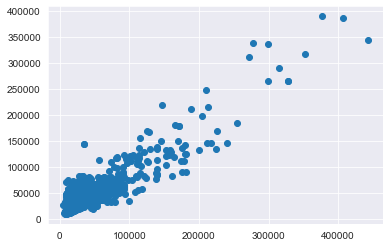

In [73]:
plt.scatter(y_test, y_pred)

C:\Users\Enzo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

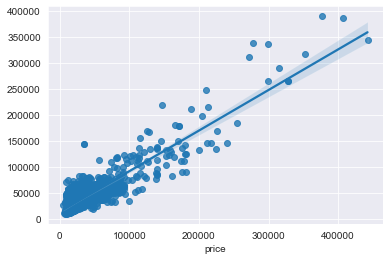

In [74]:
import seaborn as sns

sns.regplot(y_test, y_pred)

In [75]:
dd

,name,date,fuel,transmission,kilometers,doors,defauts,seller,power,displacement,motorization_type,price
0,peugeot 308 sw,2016.0,Essence,Boîte manuelle 6 rapports,106977.0,5.0,13.0,aramis,130.0,1.2,PureTech,12499.0
1,citroen c4,2015.0,Diesel,Boîte manuelle 5 rapports,135390.0,5.0,22.0,aramis,100.0,1.6,BlueHDi,10699.0
2,volkswagen polo,2014.0,Essence,Boîte manuelle 5 rapports,80770.0,3.0,12.0,aramis,60.0,1.2,None,10499.0
3,toyota yaris,2016.0,Essence,Boîte manuelle 5 rapports,98195.0,5.0,14.0,aramis,70.0,1.0,VVT-i,10999.0
4,citroen c4 cactus,2016.0,Essence,Boîte manuelle 5 rapports,42981.0,5.0,14.0,aramis,82.0,1.2,PureTech,12699.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5195,volvo v40 (2e generation),2020.0,Diesel,Manuelle,63174.0,5.0,NaN,NaN,120.0,2.0,None,19240.0
5196,citroen c3 iii phase 2,2022.0,Essence,Manuelle,22629.0,5.0,NaN,NaN,83.0,1.2,PureTech,15460.0
5197,ford ecosport phase 2,2022.0,Essence,Manuelle,94729.0,5.0,NaN,NaN,125.0,1.0,EcoBoost,16510.0
5198,nissan x-trail iii phase 2,2020.0,Diesel,Automatique,75674.0,5.0,NaN,NaN,150.0,1.7,dCi,25980.0


In [76]:
r2_score(y_pred, y_test)

0.6238762003105507